In [11]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point, Polygon
import descartes
%matplotlib inline

In [38]:
grid_data = pd.read_csv("../../data/external/grid_inside_senegal.csv")
crs = {'init':'epsg:4326'}

grid_reduced = pd.read_csv("../../data/external/grid_025x025_deg_approx_senegal.csv")

In [40]:
grid_reduced.head(2)

,X,Y,id,Unnamed: 3
0,-16.043186,16.692072,6,NaN
1,-15.793186,16.692072,7,NaN


In [41]:
grid_data = grid_data.rename(columns={"field_2":"gpslat", "field_3":"gpslon"})
grid_reduced = grid_reduced.rename(columns={"X":"gpslon", "Y":"gpslat"})

In [42]:
senegal_shapefile = gpd.read_file("../../data/gadm36_SEN_shp/gadm36_SEN_0.shp")

In [43]:
senegal_shapefile.iloc[0]

GID_0                                                     SEN
NAME_0                                                Senegal
geometry    (POLYGON ((-16.65374947 13.64958286, -16.65374...
Name: 0, dtype: object

In [44]:
senegal_shapefile.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

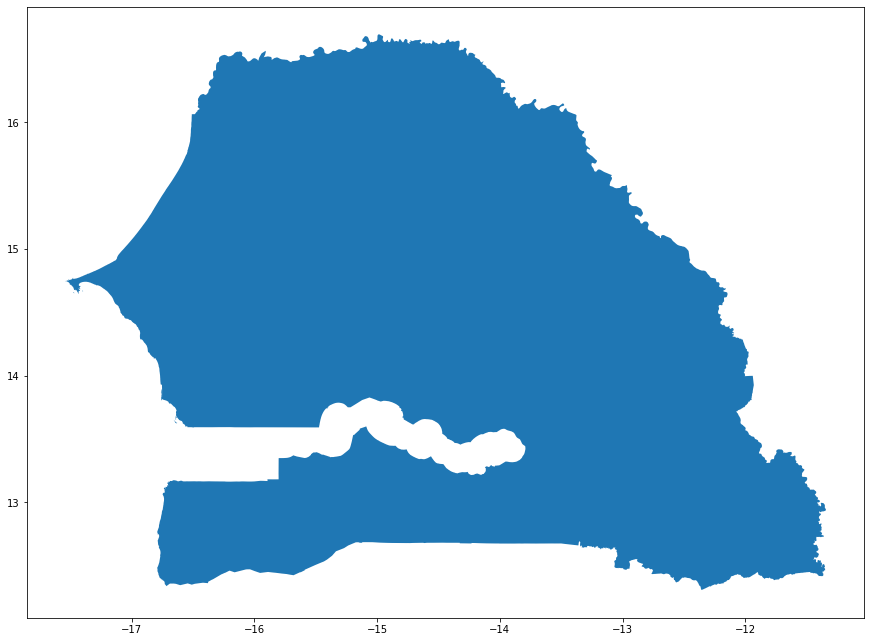

In [45]:
fig, ax = plt.subplots(figsize=(15,15))
senegal_shapefile.plot(ax=ax)

In [30]:
geometry = [Point(xy) for xy in zip(grid_data["gpslon"], grid_data["gpslat"])]

In [31]:
geo_df = gpd.GeoDataFrame(grid_data, crs=crs, geometry=geometry)

C:\Users\Tanya\anaconda3\envs\omdena-GPSDD\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [32]:
geo_df.head

<bound method NDFrame.head of       field_1     gpslat  gpslon GID_0   NAME_0                    geometry
0          97  16.620001  -15.03   SEN  Senegal  POINT (-15.03000 16.62000)
1          98  16.620001  -14.93   SEN  Senegal  POINT (-14.93000 16.62000)
2          99  16.620001  -14.83   SEN  Senegal  POINT (-14.83000 16.62000)
3         100  16.620001  -14.73   SEN  Senegal  POINT (-14.73000 16.62000)
4         101  16.620001  -14.63   SEN  Senegal  POINT (-14.63000 16.62000)
...       ...        ...     ...   ...      ...                         ...
1648     2940  12.420000  -12.13   SEN  Senegal  POINT (-12.13000 12.42000)
1649     2941  12.420000  -12.03   SEN  Senegal  POINT (-12.03000 12.42000)
1650     2943  12.420000  -11.83   SEN  Senegal  POINT (-11.83000 12.42000)
1651     2944  12.420000  -11.73   SEN  Senegal  POINT (-11.73000 12.42000)
1652     3005  12.320000  -12.33   SEN  Senegal  POINT (-12.33000 12.32000)

[1653 rows x 6 columns]>

<AxesSubplot:>

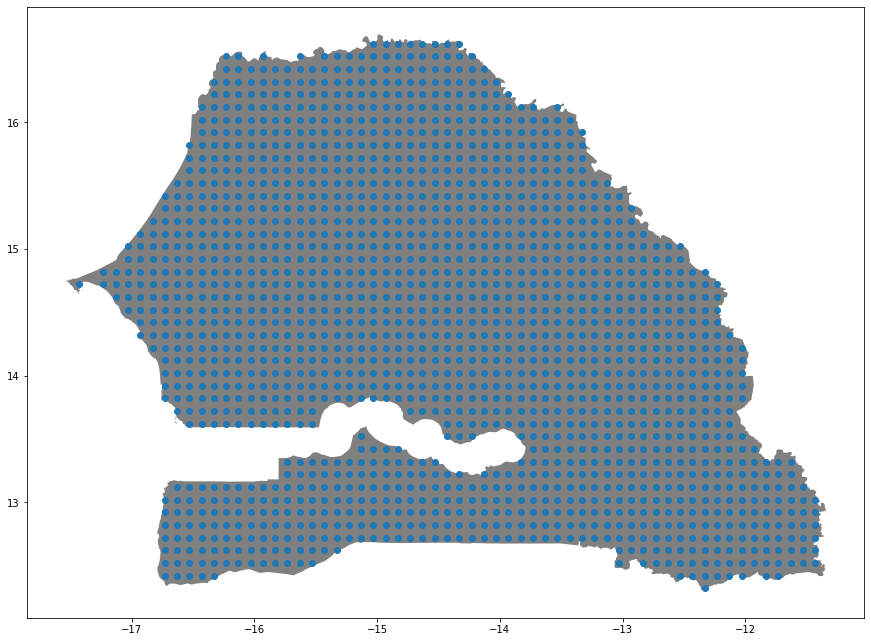

In [33]:
fig, ax = plt.subplots(figsize=(15,15))
senegal_shapefile.plot(ax=ax, color='grey')
geo_df.plot(ax=ax)


In [46]:
geometry_reduced = [Point(xy) for xy in zip(grid_reduced["gpslon"], grid_reduced["gpslat"])]
geo_reduced = gpd.GeoDataFrame(grid_reduced, crs=crs, geometry=geometry_reduced)

C:\Users\Tanya\anaconda3\envs\omdena-GPSDD\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

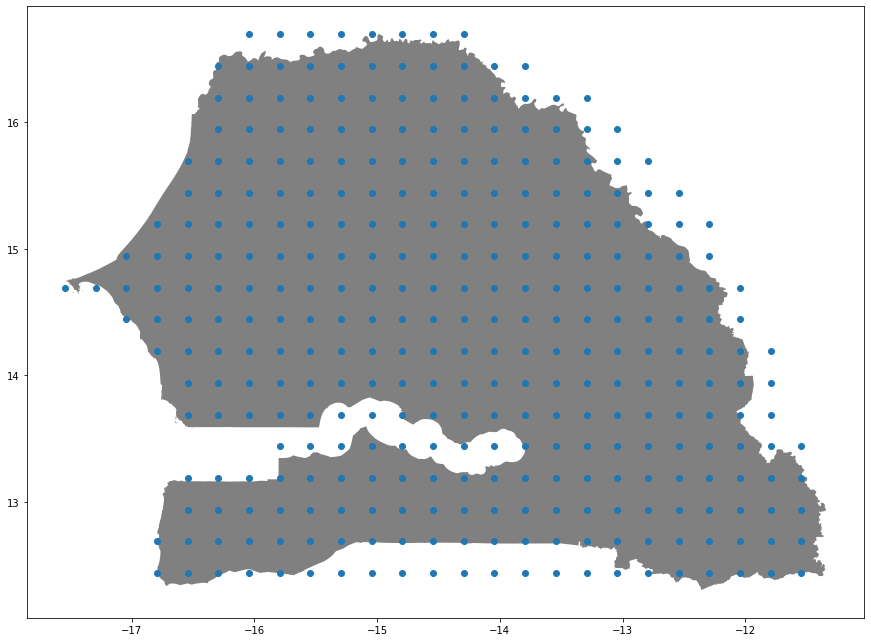

In [47]:
fig, ax = plt.subplots(figsize=(15,15))
senegal_shapefile.plot(ax=ax, color='grey')
geo_reduced.plot(ax=ax)